<a href="https://colab.research.google.com/github/gulshan0201/Algorithm_Analysis/blob/main/Algorithm_analysis_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install networkx matplotlib

--- QuickDeliver Route Optimization ---
Source Hub: A
Destination Warehouse: D
Optimized Route: A -> B -> D
Total Cost/Time: 15


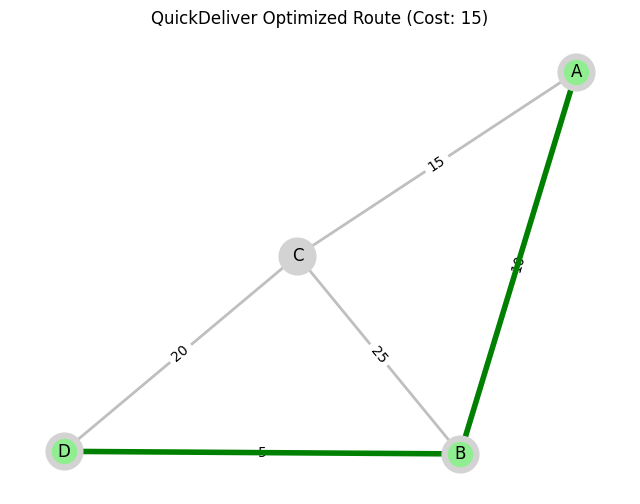

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def simulate_quickdeliver_network():
    # 1. Create the Graph
    G = nx.Graph()

    # 2. Add nodes and weighted edges based on Case Study Figure 1(a)
    # (Node1, Node2, Weight)
    edges = [
        ('A', 'B', 10),
        ('A', 'C', 15),
        ('B', 'C', 25),
        ('B', 'D', 5),
        ('C', 'D', 20)
    ]

    G.add_weighted_edges_from(edges)

    # 3. Define Source and Destination
    source = 'A'
    target = 'D'

    # 4. Calculate Shortest Path using Dijkstra's Algorithm
    try:
        shortest_path = nx.dijkstra_path(G, source=source, target=target, weight='weight')
        shortest_distance = nx.dijkstra_path_length(G, source=source, target=target, weight='weight')

        print(f"--- QuickDeliver Route Optimization ---")
        print(f"Source Hub: {source}")
        print(f"Destination Warehouse: {target}")
        print(f"Optimized Route: {' -> '.join(shortest_path)}")
        print(f"Total Cost/Time: {shortest_distance}")

    except nx.NetworkXNoPath:
        print("No path found between the selected nodes.")
        return

    # 5. Visualization (Optional but recommended for your Case Study)
    pos = nx.spring_layout(G, seed=42)  # Position nodes consistently

    plt.figure(figsize=(8, 6))

    # Draw all nodes and edges (light gray)
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightgray')
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

    # Draw edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Highlight the shortest path (Green)
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='lightgreen')
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=4, edge_color='green')

    plt.title(f"QuickDeliver Optimized Route (Cost: {shortest_distance})")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    simulate_quickdeliver_network()

In [3]:
import networkx as nx

def dynamic_routing_simulation():
    # 1. Setup Initial Graph (Same as Exercise 1)
    G = nx.Graph()
    edges = [
        ('A', 'B', 10), ('A', 'C', 15),
        ('B', 'C', 25), ('B', 'D', 5),
        ('C', 'D', 20)
    ]
    G.add_weighted_edges_from(edges)

    source, target = 'A', 'D'

    # --- STEP 1: Initial Calculation ---
    print("--- 1. Initial Route Calculation ---")
    path_1 = nx.dijkstra_path(G, source, target)
    cost_1 = nx.dijkstra_path_length(G, source, target)
    print(f"Original Best Path: {path_1}")
    print(f"Original Cost: {cost_1}\n")

    # --- STEP 2: Simulate Real-Time Traffic Data Update ---
    print("--- 2. Receiving Real-Time Traffic Data ---")
    print(">> ALERT: Heavy congestion detected on route B -> D.")
    print(">> UPDATING: Weight increased from 5 to 50.")

    # Update the specific edge weight dynamically
    G['B']['D']['weight'] = 50

    # --- STEP 3: Adaptive Re-calculation ---
    print("\n--- 3. Adaptive Route Optimization ---")
    path_2 = nx.dijkstra_path(G, source, target)
    cost_2 = nx.dijkstra_path_length(G, source, target)

    print(f"New Best Path: {path_2}")
    print(f"New Cost: {cost_2}")

    # Compare the two paths
    print(f"\nAnalysis: The system avoided the congested B-D link (Cost 60) "
          f"and switched to {path_2} (Cost 35).")

if __name__ == "__main__":
    dynamic_routing_simulation()

--- 1. Initial Route Calculation ---
Original Best Path: ['A', 'B', 'D']
Original Cost: 15

--- 2. Receiving Real-Time Traffic Data ---
>> ALERT: Heavy congestion detected on route B -> D.
>> UPDATING: Weight increased from 5 to 50.

--- 3. Adaptive Route Optimization ---
New Best Path: ['A', 'C', 'D']
New Cost: 35

Analysis: The system avoided the congested B-D link (Cost 60) and switched to ['A', 'C', 'D'] (Cost 35).
